## 1) 네이버 '코로나' 뉴스 제목 크롤링

In [92]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import datetime

df1 = pd.DataFrame(None, columns=['title', 'link'])
idx=0
for num in range(1, 10000, 10):
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(num)
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    news_list = soup.select('a.news_tit')
    title_list = [news.attrs['title'] for news in news_list]
    link_list = [news.attrs['href'] for news in news_list]
    for i in range(len(title_list)):
        df1.loc[idx] = [ title_list[i], link_list[i] ]
        idx += 1

In [93]:
df1.to_csv('data2/네이버_코로나_기사제목.csv', sep=',')

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Komoran
from wordcloud import WordCloud
plt.rc("font", family="Malgun Gothic") 
komoran = Komoran(max_heap_size=2048)
from nltk import Text

In [114]:
df1['title_nouns'] = df1['title'].apply(lambda x:komoran.nouns(x))

In [115]:
temp_list = df1['title_nouns']
word_list=[]
for temp in temp_list:
    for t in temp:
        word_list.append(t)

In [116]:
temp_list=[]
for i in range(len(word_list)):
    tagged_text = komoran.pos(word_list[i])
    for tagged in tagged_text:
        if len(tagged[0])>1:
            if (tagged[1]=='NNG') | (tagged[1]=='NNP'):
                temp_list.append(tagged[0])

In [117]:
def word_count(word_list):
    word_count={}
    for word in word_list:
        if word in word_count:
            word_count[word]+=1
        else:
            word_count[word]=1
    return word_count

In [118]:
dic = word_count(temp_list)

In [119]:
df_word = pd.DataFrame.from_dict([dic])
df_word = df_word.T
df_word = df_word.sort_values(by=0, ascending=False)
df_word.reset_index(inplace=True)
df_word.columns=['word', 'frequency']

In [120]:
df_word

,word,frequency
0,코로나,9995
1,확진,3016
2,백신,2156
3,감염,1628
4,신규,1383
...,...,...
2917,통합,1
2918,명동,1
2919,뉴스룸,1
2920,올린다,1


In [121]:
from wordcloud import STOPWORDS
불용어 = set(['코로나', '19', '확진'])
wordcloud = WordCloud(background_color='white',
                max_words=200,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2,
                 stopwords=불용어)

(-0.5, 399.5, 199.5, -0.5)

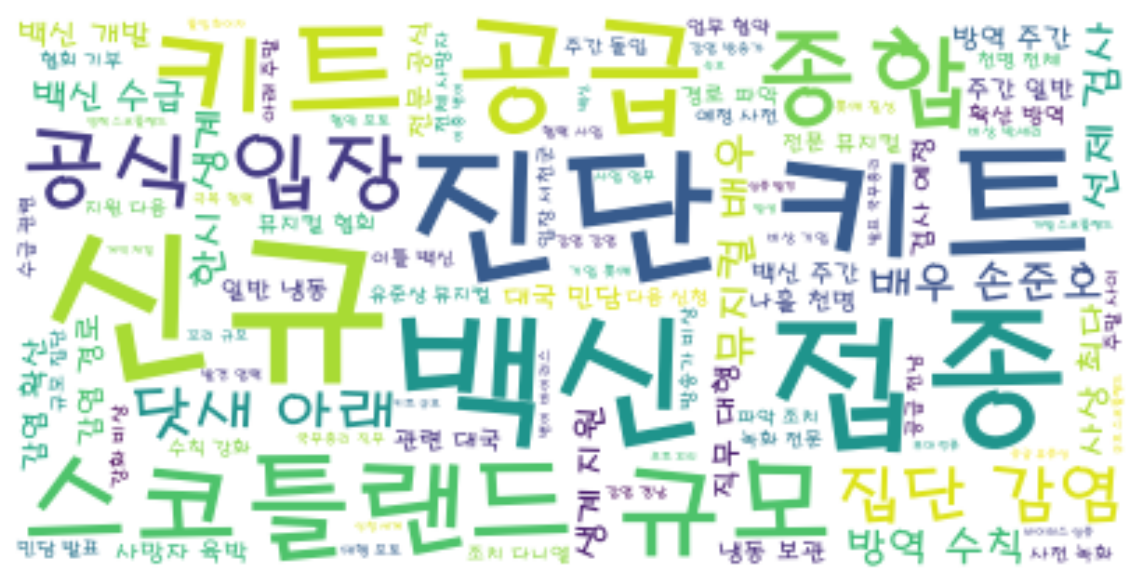

In [122]:
temp1 = ' '.join(temp_list)
wordcloud.generate(temp1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## 2) 중앙일보 웹크롤링

In [123]:
#https://news.joins.com/Search/JoongangNews?page=1&Keyword=%EC%BD%94%EB%A1%9C%EB%82%98&SortType=New&SearchCategoryType=JoongangNews

import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import datetime

df = pd.DataFrame(None, columns=['title', 'link', 'date', 'news'])
idx=0
for num in range(1, 1000): # 4.19 기준 120,581개
    url = 'https://news.joins.com/Search/JoongangNews?page='+str(num)+'&Keyword=코로나&SortType=New&SearchCategoryType=JoongangNews'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    news_list = soup.select('h2.headline a')
    link_list = [news.attrs['href'] for news in news_list]
    title_list = [news.text for news in news_list]
    date_list = soup.select('span.byline em')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}.\d{2}.\d{2}', date_list)
    for i in range(len(link_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        content_list = news_soup.select('div#article_body')
        content_list = [content.text for content in content_list]    
        df.loc[idx] = [ title_list[i], link_list[i], date_list[i], content_list]
        idx += 1

ConnectionError: HTTPSConnectionPool(host='news.joins.com', port=443): Max retries exceeded with url: /article/24035595 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001771D53D7C0>: Failed to establish a new connection: [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다'))

In [ ]:
df.to_csv('data2/중앙일보_웹크롤링.csv', sep=',')
df

In [170]:
df['temp'] = df['news']
df['temp'] = [''.join(x) for x in df['news_nouns']]
df['temp'] = df['temp'].apply(lambda x:x.replace('\n', ' '))

0     \n     신종 코로나바이러스 감염증(코로나19) 변이 바이러스 감염 사례가 70...
1     \n     울산 남구 한 초등학교 학생이 코로나19 확진판정을 받은 16일 오전 ...
2     \n     오세훈 서울시장(왼쪽)과 김인호 서울시의회 의장이 19일 오후 서울 중...
3     \n             서울시 중소기업 육성 및 산업진흥 지원기관 서울산업진흥원...
4     \n             밀알복지재단(이사장 홍정길)은 4월 20일 장애인이 날을...
                            ...                        
85    \n     조 바이든(왼쪽) 미국 대통령과 스가 요시히데(菅義偉) 일본 총리가 지...
86    \r\n\r\n\r\n\r\n미국이 자국민의 면역 효과를 유지하기 위해 백신 ‘부스...
87    \r\n\r\n\r\n\r\n         인도 세럼연구소(SII)의 CEO인 아...
88    \r\n\r\n\r\n\r\n스가 요시히데(菅義偉) 일본 총리가 미국 방문 중 앨버...
89    \n     '혈전' 발생 논란으로 한동안 접종이 보류·연기됐던 아스트라제네카(AZ...
Name: news_nouns, Length: 90, dtype: object

In [179]:
df['content'] = df['title']+df['news_nouns']
df['content']

0     영국 이어 인도發 변이까지…정은경 "3주째 확진 증가 원인"\n     신종 코로나...
1     [e글중심] "확진자 증가하는데 학교 계속 나오라고?"\n     울산 남구 한 초...
2     열흘만에 또 시의회 찾은 吳 "우린 힘모아 모기 잡는 부부 사이"\n     오세훈...
3     SBA, 중기 디지털 전환 원스톱 지원 위한 'AI 활용 사업혁신 지원' 본격화\n...
4     밀알복지재단, 장애인의 날 맞아 장애영유아 의료비 지원 캠페인\n          ...
                            ...                        
85    79세 바이든, 73세 스가와 의료용 마스크 두겹 쓰고 회담\n     조 바이든(...
86    美 3차 백신 접종까지 검토…접종률 2.9% 韓 또 대형 악재\r\n\r\n\r\n...
87    "원료 수출금지 가능" …美 국방물자법에 세계 백신공장 떤다\r\n\r\n\r\n\...
88    "스가, 화이자 CEO 통화···日 남은 대상자 맞힐 백신 공급 합의"\r\n\r\...
89    AZ 백신접종 간격 8주→12주로…“간격 길수록 효과 증가”\n     '혈전' 발...
Name: content, Length: 90, dtype: object

In [191]:
for i in range(len(df)):
    df.iloc[i,5] = df.iloc[i, 5].replace('\xa0', '').replace('\n', ' ').replace('  ', ' ')

'영국 이어 인도發 변이까지…정은경 "3주째 확진 증가 원인"   신종 코로나바이러스 감염증(코로나19) 변이 바이러스 감염 사례가 70건 추가 발견된 가운데 정은경 중앙방역대책본부장이 최근 3주 연속 증가한 코로나19 신규 환자 규모의 악화요인으로 ‘변이 바이러스’를 꼽았다. 사진은 19일 영종도 인천국제공항 제1터미널 입국장의 해외입국자들. 연합뉴스     국내 신종 코로나바이러스 감염증(코로나19) 변이 바이러스 감염 사례가 70건 추가 확인된 가운데 정은경 중앙방역대책본부장이 최근 3주 연속 증가한 코로나19 신규 환자 증가 요인으로 ‘변이 바이러스’를 꼽았다. 영국·남아프리카공화국·브라질 변이에 이어 인도 변이 바이러스도 유입돼 방역당국이 긴장하고 있다.     질병관리청 중앙방역대책본부(방대본)는 19일 지난 일주일간 총 762건의 검체를 유전체 분석한 결과 국내 발생 695건 가운데 35건(5%), 해외 유입 사례 67건 가운데 35건(52.5%) 총 70건이 추가됐다고 밝혔다. 지금까지 우리나라에서 발견된 코로나19 변이 사례는 총 449건이다. 바이러스 유형별로는 영국 변이388건, 남아공 변이 51건, 브라질 변이 10건이다.     이번에 새로 추가된 70건 가운데영국 변이 64건, 남아공 변이 5건, 브라질 변이 1건이었다. 정은경 방대본 본부장은 이날 브리핑에서 “확진자 중에 변이 바이러스 여부를 분석하는 비율이 1월 대비 3월에 5배가 증가했다”며“국내 코로나19 바이러스 특성 분석 및 발생을 확인하기 위해서 감시와 분석을 확대하고 있다”고 말했다.    정은경 중앙방역대책본부 본부장(질병관리청장)이 12일 오후 서울 종로구 세종대로 정부서울청사에서 코로나19 대응 특별방역점검회의 비대면 브리핑을 하고 있다. 뉴스1       우리나라에서 최근 인도를 중심으로 많은 확진자가 발생한 인도 변이 바이러스에 확진된 사례는 9건이었다. 9건 모두 인도에서 직접 입국한 확진자로 내국인이 5명, 외국인이 4명이었고, 추가 전파 사례는 없었다. 정

## 3) 사이언스타임즈

In [7]:
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import datetime
                
df = pd.DataFrame(None, columns=['title', 'link', 'date', 'news'])
idx=0
for num in range(1, 46): # 4.26 기준 46페이지까지
    url = 'https://www.sciencetimes.co.kr/category/sci-tech/covid-19/page/'+str(num)+'/'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('div.board_cont a')
    link_list = [link.attrs['href'] for link in link_list if link.attrs['href'].startswith('https')]
    title_list = soup.select('strong.tit')
    title_list = [title.text for title in title_list]
    date_list = soup.select('em.date')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}.\d{2}.\d{2}', date_list)
    for i in range(len(link_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('div.resize')
        news_list = [news.text for news in news_list]    
        df.loc[idx] = [ title_list[i], link_list[i], date_list[i], news_list]
        idx += 1

In [8]:
df

,title,link,date,news
0,면역을 알면 백신이 보인다,https://www.sciencetimes.co.kr/news/%eb%a9%b4%...,2021.04.26,[우리의 몸은 항상 건강하진 않다. 그 이유는 어떤 것이 있을까. 간단하게 생각해 ...
1,“무증상자와 유증상자의 바이러스양에는 큰 차이가 없다”,https://www.sciencetimes.co.kr/news/savecovid-...,2021.04.26,[\n이은정 순천향대 교수팀은 국내 코로나19 환자 중 유증상자와 무증상자가 지닌 ...
2,뇌 속의 ‘배고픔 스위치’ 비밀 알아냈다,https://www.sciencetimes.co.kr/news/%eb%87%8c-...,2021.04.21,[우리 뇌에서 배고픔을 담당하는 스위치인 MC4 수용체의 작동 원리를 밝혀낸 연구 ...
3,백신접종으로 코로나19 집단면역이 이뤄질까?,https://www.sciencetimes.co.kr/news/%eb%b0%b1%...,2021.04.21,[지난해 12월 8일 영국에서 세계 최초로 신종 코로나바이러스 감염증-19(Covi...
4,고대 동아시아인들도 코로나를 겪었다?,https://www.sciencetimes.co.kr/news/%ea%b3%a0%...,2021.04.20,[코로나19 바이러스와 관련한 일부 병원균이 2만 5000년 전에 고대 동아시아인에...
...,...,...,...,...
445,코로나바이러스 진단기술 특허 20년간 64건 출원,https://www.sciencetimes.co.kr/news/%ec%bd%94%...,2020.02.13,[2000년 이후 지난해까지 20년간 인체 감염 가능성이 있는 코로나바이러스 진단기...
446,신종코로나에서 돋보인 AI 활약상,https://www.sciencetimes.co.kr/news/%ec%8b%a0%...,2020.02.07,[신종코로나 같은 질병이 처음 발생하면 정부나 공중보건기관들은 대중들에게 새로운 전...
447,"정부, 신종코로나 긴급연구에 10억 투입…”진단·치료제 개발”",https://www.sciencetimes.co.kr/news/%ec%a0%95%...,2020.02.07,[정부가 신종 코로나바이러스 연구개발(R&D)에 올해 약 10억원을 투입한다.\n과...
448,사스 등 플랫폼 활용…백신 조기 개발 기대,https://www.sciencetimes.co.kr/news/%ec%82%ac%...,2020.02.06,[감염 환자가 다녀간 영화관이 방역 후 재개관을 한다고 하는데 과연 안전할까. 신종...


In [9]:
df.to_csv('data2/사이언스타임즈.csv', sep=',')

In [12]:
df1 = df.loc[:, ['title', 'date', 'news']]
df1.shape

(450, 3)

In [13]:
df1['date'] = df1['date'].apply(lambda x:x[2:7])
df1

,title,date,news
0,면역을 알면 백신이 보인다,21.04,[우리의 몸은 항상 건강하진 않다. 그 이유는 어떤 것이 있을까. 간단하게 생각해 ...
1,“무증상자와 유증상자의 바이러스양에는 큰 차이가 없다”,21.04,[\n이은정 순천향대 교수팀은 국내 코로나19 환자 중 유증상자와 무증상자가 지닌 ...
2,뇌 속의 ‘배고픔 스위치’ 비밀 알아냈다,21.04,[우리 뇌에서 배고픔을 담당하는 스위치인 MC4 수용체의 작동 원리를 밝혀낸 연구 ...
3,백신접종으로 코로나19 집단면역이 이뤄질까?,21.04,[지난해 12월 8일 영국에서 세계 최초로 신종 코로나바이러스 감염증-19(Covi...
4,고대 동아시아인들도 코로나를 겪었다?,21.04,[코로나19 바이러스와 관련한 일부 병원균이 2만 5000년 전에 고대 동아시아인에...
...,...,...,...
445,코로나바이러스 진단기술 특허 20년간 64건 출원,20.02,[2000년 이후 지난해까지 20년간 인체 감염 가능성이 있는 코로나바이러스 진단기...
446,신종코로나에서 돋보인 AI 활약상,20.02,[신종코로나 같은 질병이 처음 발생하면 정부나 공중보건기관들은 대중들에게 새로운 전...
447,"정부, 신종코로나 긴급연구에 10억 투입…”진단·치료제 개발”",20.02,[정부가 신종 코로나바이러스 연구개발(R&D)에 올해 약 10억원을 투입한다.\n과...
448,사스 등 플랫폼 활용…백신 조기 개발 기대,20.02,[감염 환자가 다녀간 영화관이 방역 후 재개관을 한다고 하는데 과연 안전할까. 신종...


In [18]:
df1['news'] = [' '.join(x) for x in df1['news']]
df1['news']

0      우리의 몸은 항상 건강하진 않다. 그 이유는 어떤 것이 있을까. 간단하게 생각해 크...
1      \n이은정 순천향대 교수팀은 국내 코로나19 환자 중 유증상자와 무증상자가 지닌 바...
2      우리 뇌에서 배고픔을 담당하는 스위치인 MC4 수용체의 작동 원리를 밝혀낸 연구 결...
3      지난해 12월 8일 영국에서 세계 최초로 신종 코로나바이러스 감염증-19(Covid...
4      코로나19 바이러스와 관련한 일부 병원균이 2만 5000년 전에 고대 동아시아인에게...
                             ...                        
445    2000년 이후 지난해까지 20년간 인체 감염 가능성이 있는 코로나바이러스 진단기술...
446    신종코로나 같은 질병이 처음 발생하면 정부나 공중보건기관들은 대중들에게 새로운 전염...
447    정부가 신종 코로나바이러스 연구개발(R&D)에 올해 약 10억원을 투입한다.\n과학...
448    감염 환자가 다녀간 영화관이 방역 후 재개관을 한다고 하는데 과연 안전할까. 신종 ...
449    과학기술정보통신부는 5일 한국정보통신진흥협회(KAIT) 대회의실에서 신종 코로나바이...
Name: news, Length: 450, dtype: object

In [20]:
df1['content'] = df1['title'] + df1['news']
df1

,title,date,news,content
0,면역을 알면 백신이 보인다,21.04,우리의 몸은 항상 건강하진 않다. 그 이유는 어떤 것이 있을까. 간단하게 생각해 크...,면역을 알면 백신이 보인다우리의 몸은 항상 건강하진 않다. 그 이유는 어떤 것이 있...
1,“무증상자와 유증상자의 바이러스양에는 큰 차이가 없다”,21.04,\n이은정 순천향대 교수팀은 국내 코로나19 환자 중 유증상자와 무증상자가 지닌 바...,“무증상자와 유증상자의 바이러스양에는 큰 차이가 없다”\n이은정 순천향대 교수팀은 ...
2,뇌 속의 ‘배고픔 스위치’ 비밀 알아냈다,21.04,우리 뇌에서 배고픔을 담당하는 스위치인 MC4 수용체의 작동 원리를 밝혀낸 연구 결...,뇌 속의 ‘배고픔 스위치’ 비밀 알아냈다우리 뇌에서 배고픔을 담당하는 스위치인 MC...
3,백신접종으로 코로나19 집단면역이 이뤄질까?,21.04,지난해 12월 8일 영국에서 세계 최초로 신종 코로나바이러스 감염증-19(Covid...,백신접종으로 코로나19 집단면역이 이뤄질까?지난해 12월 8일 영국에서 세계 최초로...
4,고대 동아시아인들도 코로나를 겪었다?,21.04,코로나19 바이러스와 관련한 일부 병원균이 2만 5000년 전에 고대 동아시아인에게...,고대 동아시아인들도 코로나를 겪었다?코로나19 바이러스와 관련한 일부 병원균이 2만...
...,...,...,...,...
445,코로나바이러스 진단기술 특허 20년간 64건 출원,20.02,2000년 이후 지난해까지 20년간 인체 감염 가능성이 있는 코로나바이러스 진단기술...,코로나바이러스 진단기술 특허 20년간 64건 출원2000년 이후 지난해까지 20년간...
446,신종코로나에서 돋보인 AI 활약상,20.02,신종코로나 같은 질병이 처음 발생하면 정부나 공중보건기관들은 대중들에게 새로운 전염...,신종코로나에서 돋보인 AI 활약상신종코로나 같은 질병이 처음 발생하면 정부나 공중보...
447,"정부, 신종코로나 긴급연구에 10억 투입…”진단·치료제 개발”",20.02,정부가 신종 코로나바이러스 연구개발(R&D)에 올해 약 10억원을 투입한다.\n과학...,"정부, 신종코로나 긴급연구에 10억 투입…”진단·치료제 개발”정부가 신종 코로나바이..."
448,사스 등 플랫폼 활용…백신 조기 개발 기대,20.02,감염 환자가 다녀간 영화관이 방역 후 재개관을 한다고 하는데 과연 안전할까. 신종 ...,사스 등 플랫폼 활용…백신 조기 개발 기대감염 환자가 다녀간 영화관이 방역 후 재개...


In [21]:
from konlpy.tag import Komoran
komoran = Komoran()
df1['nouns'] = df1['content'].apply(lambda x:komoran.nouns(x))

In [23]:
df1.to_csv('data2/사이언스타임즈_전처리.csv', sep=',')

In [24]:
#단어 빈도수 계산하는 함수
def word_count(word_list):
    word_count = {}
    for word in word_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

In [73]:
#word_list = sum(df1['nouns'], [])
word_list = [word for words in df1['nouns'] for word in words if len(word)>1]

In [75]:
dic = word_count(word_list)
df_word = pd.DataFrame.from_dict([dic])
df_word = df_word.T
df_word = df_word.sort_values(by=0, ascending=False)
df_word.reset_index(inplace=True)
df_word.columns=['word', 'frequency']

In [76]:
df_word1 = df_word[df_word['frequency']>=5]

In [87]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#불용어 = set([])
wordcloud = WordCloud(background_color='white',
                max_words=300,
                 font_path='c:/Windows/Fonts/malgun.ttf',
                 relative_scaling=0.2) #워드 클라우드에서 불용어 제외시키기

(-0.5, 399.5, 199.5, -0.5)

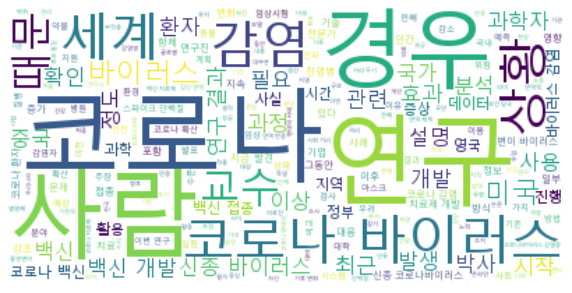

In [88]:
#워드 클라우드 그리기
temp = ' '.join(word_list)
wordcloud.generate(temp)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#wordcloud.to_file('data2/wordcloud_코로나.jpg')

<AxesSubplot:xlabel='word', ylabel='frequency'>

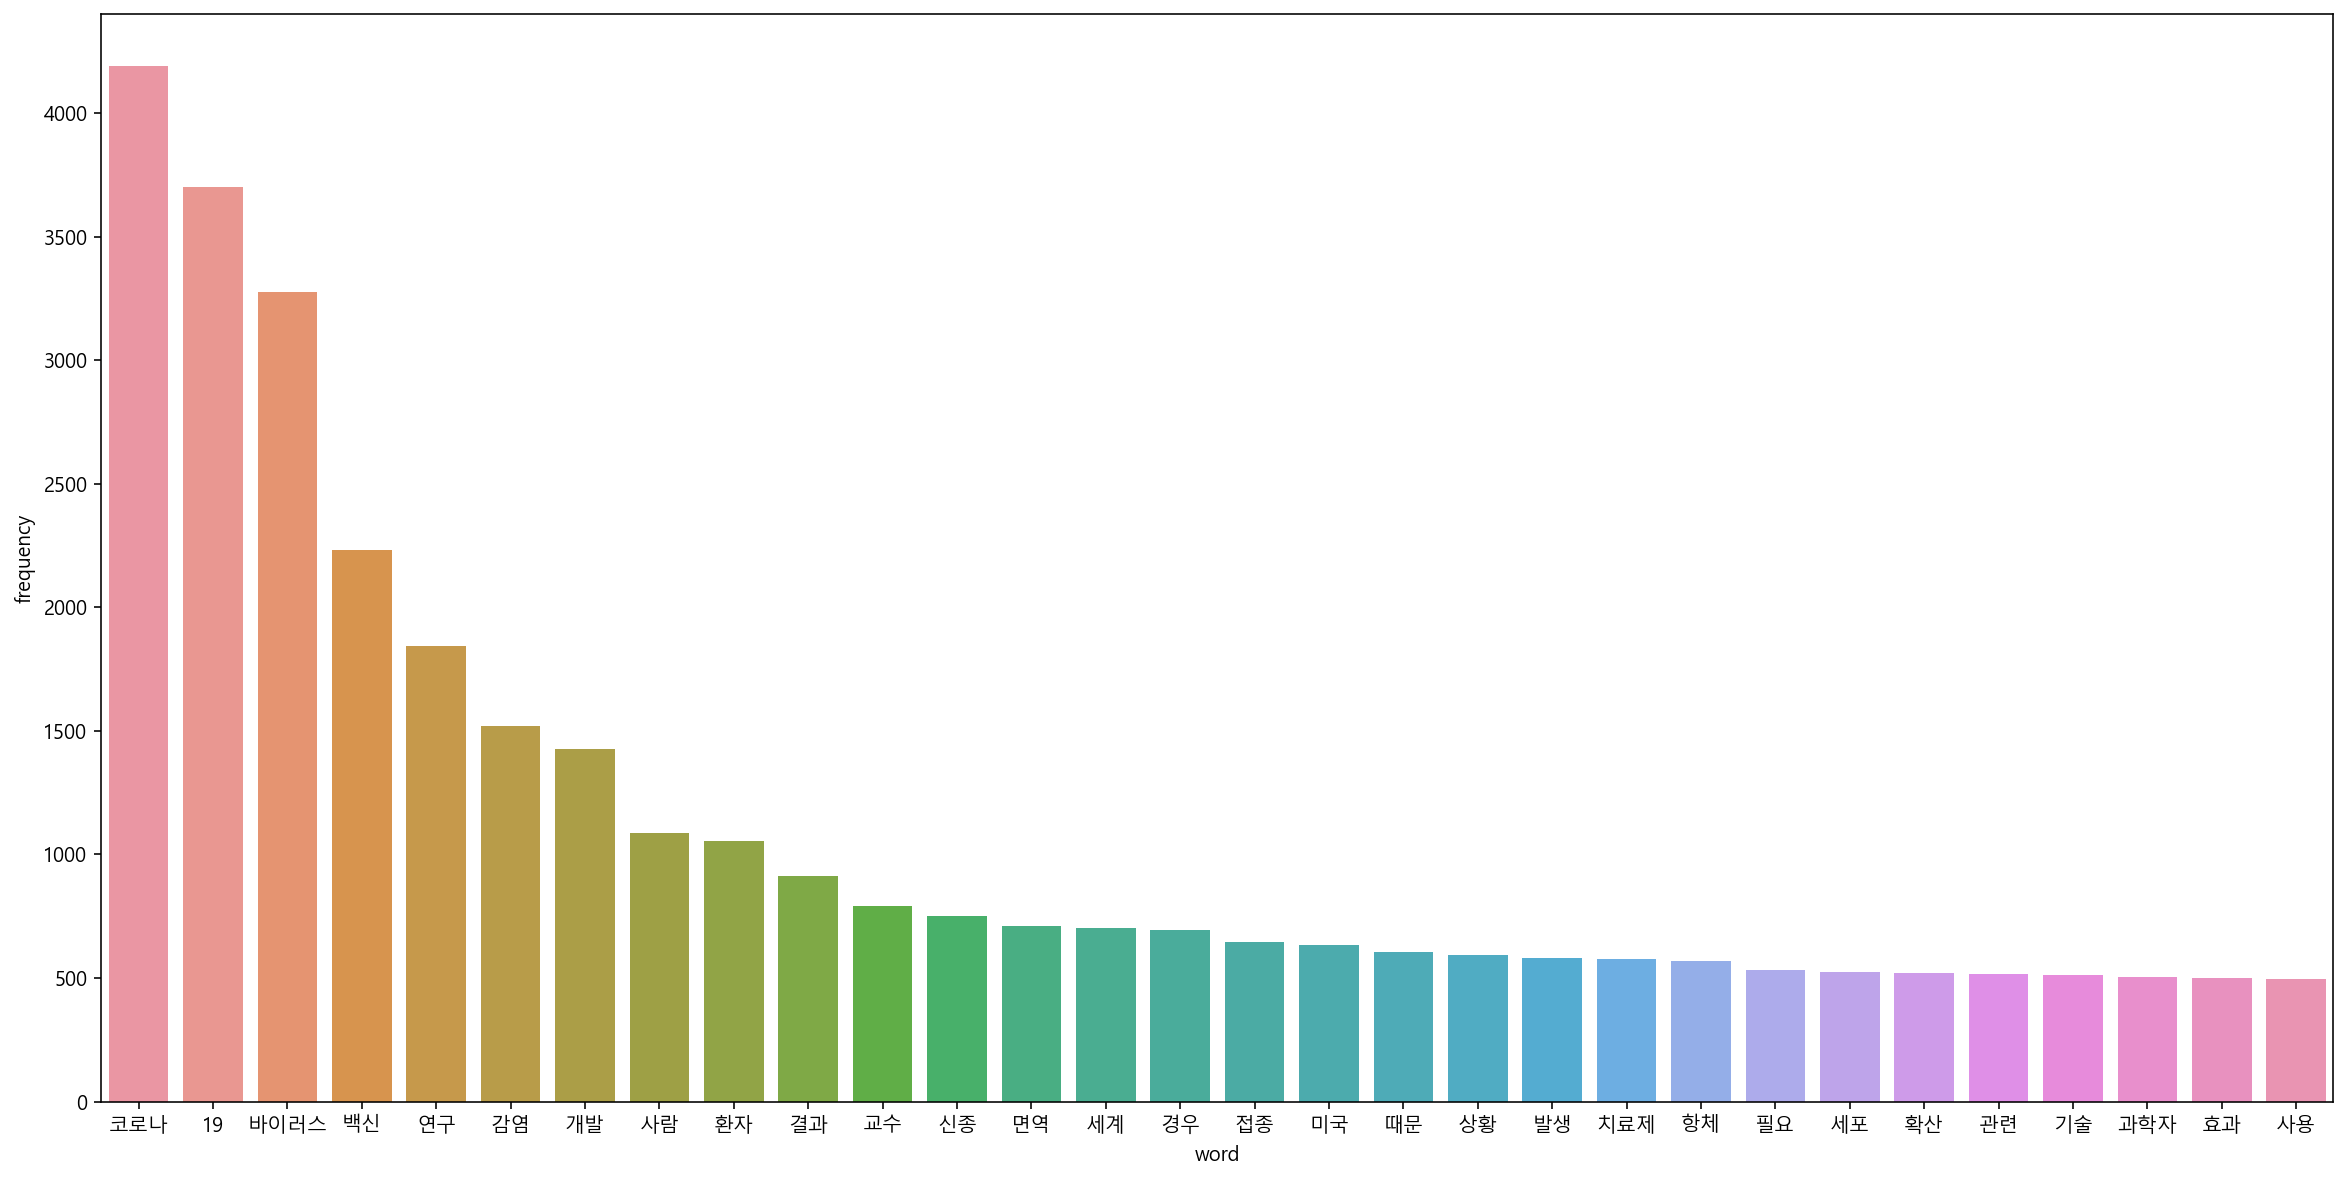

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
plt.figure(figsize=(20,10))
sns.barplot(x='word', y='frequency', data=df_word1[:30])

## 4) 빅카인즈
- 최대 20,000건 데이터 다운로드

In [99]:
df3 = pd.read_excel('data/NewsResult_20200101-20210423.xlsx')
df4 = df3.loc[:,['일자', '제목', '키워드', '본문']]

(-0.5, 399.5, 199.5, -0.5)

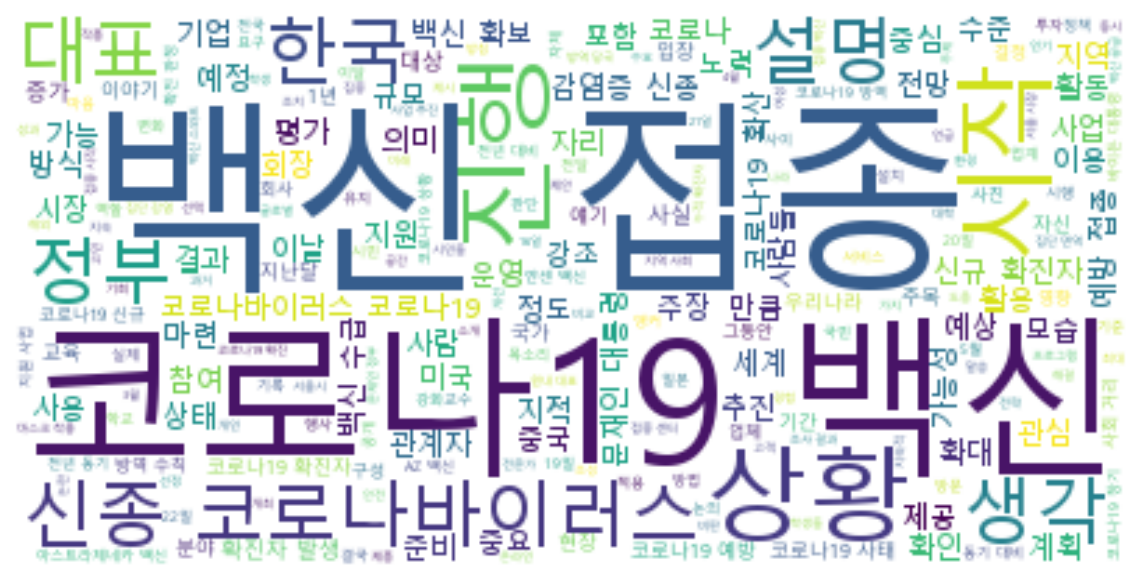

In [110]:
temp = ' '.join(df4['키워드'])
wordcloud.generate(temp)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

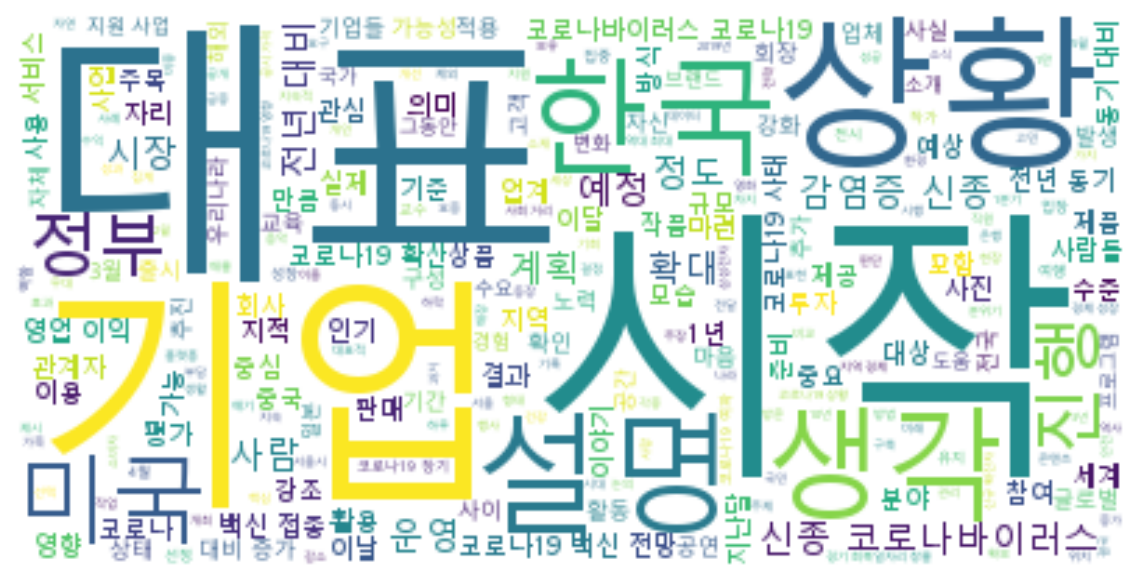

In [111]:
df3 = pd.read_excel('data/NewsResult_20210423.xlsx')
df4 = df3.loc[:,['일자', '제목', '키워드', '본문']]
temp = ' '.join(df4['키워드'])
wordcloud.generate(temp)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [112]:
df4

,일자,제목,키워드,본문
0,20210423,[서천다문화]천혜의 비경을 간직한 필리핀 파굿풋,"천혜,비경,간직,필리핀,파굿풋,노르테,필리핀,일로코스,파굿풋,루손,북쪽,루손,위치,...",필리핀 일로코스 노르테의 파굿풋은 루손 섬 북쪽에 위치한 해안 마을이다. \n마닐라...
1,20210423,달성습지생태학습관 '한반도 자생생물 세밀화' 특별기획전,"자생생물,달성,습지,생태,학습관,한반도,자생,생물,특별기획전,달성습지생태학습관,기획...",달성습지생태학습관은 오는 6월 30일까지 3층 기획전시실에서 환경부 국립생물자원관의...
2,20210423,고창군 드라이브스루 판매 방울토마토 지주식 김 등 인기,"고창군,드라이브스루,판매,방울토마토,지주식,인기,고창군,야심,준비,코로나19,지역농...",고창군이 야심 차게 준비한 코로나19에 따른 지역농산물 팔아주기 운동일환인 ‘고창...
3,20210423,남원에서 만난 한옥과 함께한 ‘전통혼례’ 풍경,"남원,한옥,전통혼례,풍경,코로나19,결혼식,풍경,초반,동네,함진애비,복고,드라마,옛...",코로나19로 결혼식의 풍경도 바뀌었다. \n\n 90년대 초반까지만 해도 온 동네를...
4,20210423,"익산시, 다중이용업소 점검 위반사례 ‘적발’","익산시,다중,이용,업소,점검,위반,사례,적발,익산시,방지,코로나19,확산,다중이용업...",익산시가 코로나19 확산 방지를 위해 다중이용업소에 대한 점검을 강화한 결과 위반사...
...,...,...,...,...
19995,20210402,"HMM, 中企에 선복 우선 제공...중진공과 MOU 체결","HMM,中企,선복,제공,중진공,MOU,체결,HMM,우리나라,최대,원양,국적,선사,해...",우리나라 최대 원양 국적선사 HMM이 해외수출에 어려움을 겪고 있는 중소기업에게 선...
19996,20210402,"[중국 마이종목]트립닷컴, 홍콩증시 2차상장 최대 20억弗 조달 예상","트립닷컴,홍콩,증시,상장,최대,20억,조달,예상,로이터,NAR,외신,보도,청약,공모...",※'중국 마이종목'은 주식시장에서 이슈가 되는 중국 종목을 소개하는 코너입니다. ...
19997,20210402,"설탕없는과자공장, 헌혈의집에 케이크 1000만 원 상당 기부","설탕,과자공장,헌혈,기부,케이크,푸드,브랜드,설탕,과자공장,설공,코로나19,장기,혈...",무설탕 푸드 브랜드 '설탕없는과자공장(설공)'은 코로나19 장기화로 혈액 수급난을 ...
19998,20210402,"쿠쿠, 미국 베트남서 매출 400% 성장 ‘현지 맞춤 전략 통했다’","쿠쿠,미국,베트남,성장,매출,400%,현지,맞춤,전략,쿠쿠,전년,해외,실적,56%증...","[아시아경제 김희윤 기자] 쿠쿠가 미국, 베트남 등에서 맞춤 전략을 통해 매출이 큰..."
